# Example usage of CXR-Age

In [2]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# allow cxrage import
import sys
sys.path.append('../assets/scripts')

from cxrage import load_model, process, age_fn
import PIL
import matplotlib.pyplot as plt
import os

### Basic Use

Raw prediction: 0.20601525902748108
Predicted age: 66.95936584472656


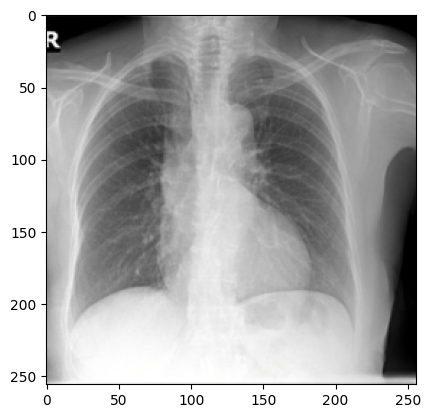

In [5]:
# load model
learn = load_model('../assets/')

# plot image
img = PIL.Image.open('../assets/cxrs/sample1.png')
plt.imshow(img)

# load image
img = process('../assets/cxrs/sample1.png')

# predict
pred = learn.model(img)
print('Raw prediction: ' + str(pred.item()))
print('Predicted age: ' + str(age_fn(pred).item()))

### Interpolation Sanity Check

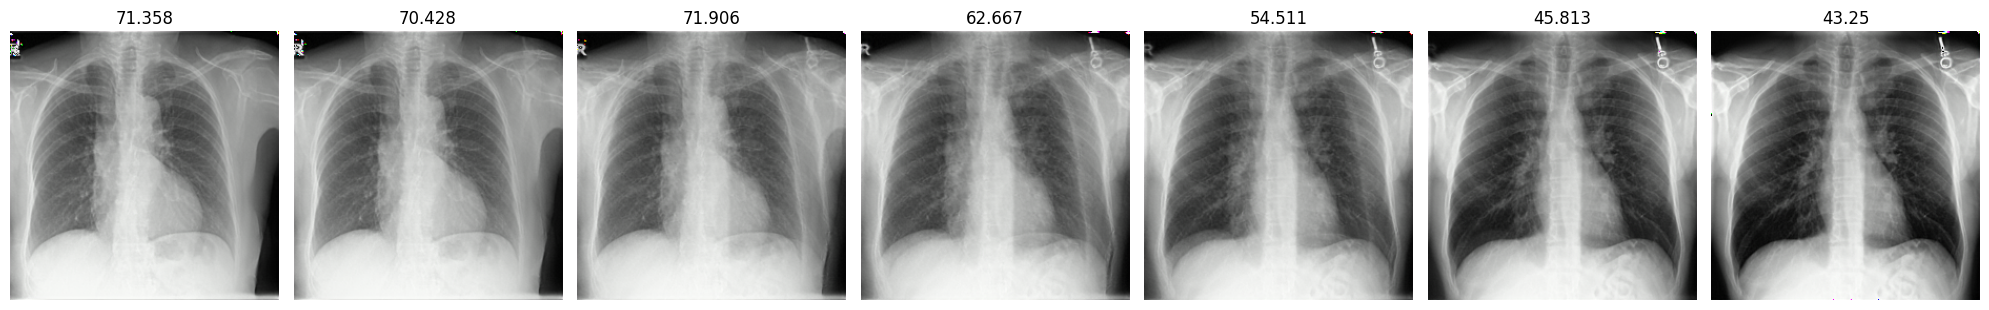

In [30]:
# load all images from interpolation dir
imgs = []
imgs_unprocessed = []
for file in sorted(os.listdir('../assets/cxrs/interp')):
    img = process('../assets/cxrs/interp/' + file)
    imgs_unprocessed.append(PIL.Image.open('../assets/cxrs/interp/' + file))
    imgs.append(img)

# predict
preds = []
for img in imgs:
    pred = learn.model(img)
    preds.append(age_fn(pred).item())

# plot all images, title with predicted age
fig, ax = plt.subplots(1, len(imgs), figsize=(20, 20))
for i in range(len(imgs)):
    ax[i].imshow(imgs_unprocessed[i])
    ax[i].axis('off')
    ax[i].set_title(str(round(preds[i], 3)))
plt.tight_layout()
plt.show()